In [ ]:
# ALUNOS ENEM

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
#importar dados
dataset = pd.read_csv("Alunos_Enem.csv", sep =",")
#visulizar
dataset.head()

,ID Aluno,Região,Sexo,Idade,Ensino Médio,Cor/Raça,Estado Civil,Necessidade Especial declarada,Taxa de Inscrição,Data conclusão EM
0,1,Norte,Masculino,9,Concluído,Não declarada,Solteiro,Sem declaração,Pagante,07/08/21
1,2,Nordeste,Feminino,23,Concluído,Branca,Casado,Sem declaração,Isento,22/06/21
2,3,Sul,Masculino,16,Incompleto,Preta,Divorciado,S/D,Pagante,02 de maio de 2021
3,4,Sudeste,Feminino,16,Incompleto,Parda,Viúvo,Sem declaração,Pagante,22/06/21
4,5,Centro-Oeste,Masculino,18,Concluído,Amarela,Solteiro,NaN,Pagante,22/06/21


In [ ]:
#Verificar se há objetos repetidos no dataset e eliminar
dataset[dataset.duplicated(['ID Aluno'],keep=False)]

,ID Aluno,Região,Sexo,Idade,Ensino Médio,Cor/Raça,Estado Civil,Necessidade Especial declarada,Taxa de Inscrição,Data conclusão EM
5,6,Brasília,Feminino,27,Concluído,Indígena,Casado,Sem declaração,Pagante,07/08/21
6,7,CO,Masculino,27,Concluído,Não declarada,Divorciado,S/D,Isento,22/06/21
15,6,Brasília,Feminino,27,Concluído,Indígena,Casado,Sem declaração,Pagante,18 de novembro de 2021
19,19,Sul,Masculino,16,Incompleto,Parda,Casado,S/D,Isento,18 de novembro de 2021
20,20,SE,NaN,19,Concluído,Preta,Divorciado,NaN,Não paga,07/08/21
21,19,Sul,Masculino,16,Incompleto,Parda,Casado,S/D,Isento,18 de novembro de 2021
22,20,SE,NaN,19,Concluído,Preta,Divorciado,NaN,Não paga,07/08/21
43,41,Norte,Feminino,21,Concluído,Preta,Não sei,Deficiência Física,NaN,03 de dezembro de 2020
61,59,Nordeste,NaN,17,Incompleto,Branca,NaN,Deficit de atenção,NaN,07/08/21
72,7,CO,Masculino,19,Concluído,Não declarada,Divorciado,S/D,Isento,22/06/21


In [ ]:
#Excluir o duplicado pelo ID
dataset.drop_duplicates(subset="ID Aluno", keep='first',inplace=True)
#buscamos duplicados
dataset[dataset.duplicated(['ID Aluno'],keep= False)]

,ID Aluno,Região,Sexo,Idade,Ensino Médio,Cor/Raça,Estado Civil,Necessidade Especial declarada,Taxa de Inscrição,Data conclusão EM


In [ ]:
#Tratamento do atributo Região
agrupado = dataset.groupby(['Região']).size()
#agrupado

In [6]:
#Padronizar os estados: N , NE, S, SE, CO
dataset['Região'] = dataset['Região'].replace({
    'N': 'Norte',
    'NE': 'Nordeste',
    'S': 'Sul',
    'SE': 'Sudeste',
    'CO': 'Centro-Oeste',
    'Paraíba':'Nordeste',
    'Brasília':'Centro-Oeste'

})
dataset['Região'] = dataset['Região'].fillna("Não informado")
agrupado = dataset.groupby(['Região']).size()
agrupado

,0
Região,
Centro-Oeste,14
Nordeste,15
Norte,10
Não informado,13
Sudeste,10
Sul,14


In [28]:
#Tratamento do atributo Sexo: preencher dados ausentes com a moda utilizando fillna e isnull
# Tratamento do atributo Sexo: padronizar e preencher dados ausentes com a moda
# Primeiro, padronizar os valores
dataset['Sexo'] = dataset['Sexo'].replace({
    'F': 'Feminino',
    'M': 'Masculino'
})

# Verificar a contagem após a padronização
agrupado = dataset.groupby(['Sexo']).size()
print(f"Contagem de registros por sexo após padronização:\n{agrupado}")

# Verificar dados ausentes
dadosausentes = dataset['Sexo'].isnull().sum()
print(f"Quantidade de dados ausentes na coluna 'Sexo': {dadosausentes}")

# Calcular a moda
modesex = dataset['Sexo'].mode()[0]
print(f"Moda do sexo: {modesex}")

# Preencher valores ausentes com a moda
dataset['Sexo'] = dataset['Sexo'].fillna(modesex)

# Verificar dados ausentes após preenchimento
dadosausentes_final = dataset['Sexo'].isnull().sum()
print(f"Quantidade de dados ausentes após o preenchimento: {dadosausentes_final}")

# Verificar contagem final
agrupado_final = dataset.groupby(['Sexo']).size()
print(f"Contagem final de registros por sexo:\n{agrupado_final}")


Contagem de registros por sexo após padronização:
Sexo
Feminino     42
Masculino    14
dtype: int64
Quantidade de dados ausentes na coluna 'Sexo': 0
Moda do sexo: Feminino
Quantidade de dados ausentes após o preenchimento: 0
Contagem final de registros por sexo:
Sexo
Feminino     42
Masculino    14
dtype: int64


In [13]:

#Tratamento idade: a idade dos alunos deve ser considerada > 16 anos e menor que 60 anos
#utilizar a função loc para selecionar as idades e substituir pela mediana
# Calcular a mediana considerando apenas idades válidas
valid_ages = dataset.loc[(dataset['Idade'] > 16) & (dataset['Idade'] < 60), 'Idade']
mediana = valid_ages.median()  # ou sts.median(valid_ages) se preferir usar o stats
print(f"Mediana das idades válidas: {mediana}")

# Substituir idades inválidas pela mediana
dataset.loc[(dataset['Idade'] <= 16) | (dataset['Idade'] >= 60), 'Idade'] = mediana

# Preencher valores nulos com a mediana
dataset.fillna({'Idade':mediana},inplace=True)

# Converter para inteiro
dataset['Idade'] = dataset['Idade'].astype(int)

print(f"Quantidade total de alunos após tratamento: {len(dataset)}")
print(dataset.isnull().sum())

Mediana das idades válidas: 24.0
Quantidade total de alunos após tratamento: 56
ID Aluno                           0
Região                             0
Sexo                               0
Idade                              0
Ensino Médio                      17
Cor/Raça                          11
Estado Civil                      14
Necessidade Especial declarada     6
Taxa de Inscrição                 29
Data conclusão EM                  0
dtype: int64


In [14]:
#Analise numérica do atributo IDADE
dataset['Idade'].describe()

,Idade
count,56.000000
mean,25.464286
std,8.506606
min,17.000000
25%,19.000000
50%,24.000000
75%,28.000000
max,52.000000


In [15]:
#Calculo da Mediana do atributo IDADE
mediana = sts.median(dataset['Idade'])
mediana

24.0

Text(0.5, 1.0, 'Idade ')

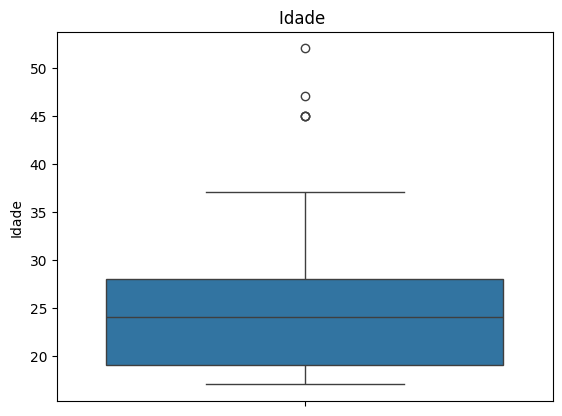

In [16]:
srn.boxplot(dataset['Idade']).set_title('Idade ')

In [17]:
dataset['Idade'].describe()


,Idade
count,56.000000
mean,25.464286
std,8.506606
min,17.000000
25%,19.000000
50%,24.000000
75%,28.000000
max,52.000000


In [21]:
#Os demais atributos qualitativos devem ter seus dados ausentes substituidos pela moda
# Contagem de registros por 'Ensino Médio'
# Lista de atributos qualitativos que precisam ser tratados
atributos_qualitativos = ['Ensino Médio','Cor/Raça', 'Estado Civil', 'Necessidade Especial declarada', 'Taxa de Inscrição']

# Tratamento para cada atributo
for atributo in atributos_qualitativos:
    print(f"\n----- Tratamento do atributo '{atributo}' -----")

    # Contagem de registros
    agrupado = dataset.groupby([atributo]).size()
    print(f"Contagem de registros por '{atributo}':\n{agrupado}")

    # Verificando dados ausentes
    dadosausentes = dataset[atributo].isnull().sum()
    print(f"Quantidade de dados ausentes na coluna '{atributo}': {dadosausentes}")

    # Calculando a moda
    if dadosausentes > 0:
        moda = dataset[atributo].mode()[0]
        print(f"Moda do '{atributo}': {moda}")

        # Preenchendo valores ausentes com a moda
        dataset[atributo] = dataset[atributo].fillna(moda)

        # Verificando se ainda há dados ausentes após o preenchimento
        dadosausentes_final = dataset[atributo].isnull().sum()
        print(f"Quantidade de dados ausentes após o preenchimento: {dadosausentes_final}")

        # Contagem de registros após o preenchimento
        agrupado_final = dataset.groupby([atributo]).size()
        print(f"Contagem de registros por '{atributo}' após o preenchimento:\n{agrupado_final}")
    else:
        print(f"Não há dados ausentes na coluna '{atributo}'.")



----- Tratamento do atributo 'Ensino Médio' -----
Contagem de registros por 'Ensino Médio':
Ensino Médio
Concluído     48
Incompleto     8
dtype: int64
Quantidade de dados ausentes na coluna 'Ensino Médio': 0
Não há dados ausentes na coluna 'Ensino Médio'.

----- Tratamento do atributo 'Cor/Raça' -----
Contagem de registros por 'Cor/Raça':
Cor/Raça
Amarela           6
Branca            8
Indígena          7
Não declarada     2
Parda             8
Preta            25
dtype: int64
Quantidade de dados ausentes na coluna 'Cor/Raça': 0
Não há dados ausentes na coluna 'Cor/Raça'.

----- Tratamento do atributo 'Estado Civil' -----
Contagem de registros por 'Estado Civil':
Estado Civil
Casado        26
Divorciado     8
Não sei        8
Solteiro      12
Viúvo          2
dtype: int64
Quantidade de dados ausentes na coluna 'Estado Civil': 0
Não há dados ausentes na coluna 'Estado Civil'.

----- Tratamento do atributo 'Necessidade Especial declarada' -----
Contagem de registros por 'Necessidade E

In [24]:
#O atributo data deve estar no formato dd/mm/aaaa
# Primeiro, verifique os formatos atuais
print("Valores únicos na coluna 'Data conclusão EM':")
print(dataset['Data conclusão EM'].unique())

# Importar biblioteca para manipulação de datas
import pandas as pd
from datetime import datetime

# Função para padronizar as datas
def padronizar_data(data_str):
    if pd.isna(data_str):
        return data_str

    # Para datas no formato "dd/mm/yy"
    try:
        data = datetime.strptime(data_str, '%d/%m/%y')
        return data.strftime('%d/%m/%Y')
    except:
        pass

    # Para datas no formato "dd de mês de aaaa"
    try:
        # Substituir nomes dos meses por números
        meses = {'janeiro': '01', 'fevereiro': '02', 'março': '03', 'abril': '04',
                 'maio': '05', 'junho': '06', 'julho': '07', 'agosto': '08',
                 'setembro': '09', 'outubro': '10', 'novembro': '11', 'dezembro': '12'}

        for mes_nome, mes_num in meses.items():
            if mes_nome in data_str.lower():
                partes = data_str.lower().replace(" de ", " ").split()
                dia = partes[0].zfill(2)  # Adiciona zero à esquerda se necessário
                ano = partes[2]
                if len(ano) == 2:  # Se o ano estiver no formato 'aa'
                    ano = '20' + ano  # Assumindo que todos os anos são do século 21
                return f"{dia}/{mes_num}/{ano}"
    except:
        pass

    # Se nenhum formato conhecido funcionar, retorna o original
    return data_str

# Aplicar a função à coluna de data
dataset['Data conclusão EM'] = dataset['Data conclusão EM'].apply(padronizar_data)

# Verificar o resultado
print("\nValores após padronização:")
print(dataset['Data conclusão EM'].unique())

# Preencher valores nulos com uma data padrão ou a moda
if dataset['Data conclusão EM'].isnull().sum() > 0:
    # Calcular a moda das datas
    moda_data = dataset['Data conclusão EM'].mode()[0]
    print(f"\nModa da data: {moda_data}")

    # Preencher valores nulos
    dataset['Data conclusão EM'] = dataset['Data conclusão EM'].fillna(moda_data)

    print(f"Quantidade de dados ausentes após o preenchimento: {dataset['Data conclusão EM'].isnull().sum()}")

Valores únicos na coluna 'Data conclusão EM':
['22/06/2021' '07/08/2021' '02/05/2021' '29/05/2022' '18/11/2021'
 '15/02/2021' '29/05/2021' '22/08/2023' '03/12/2020' '08/08/2022'
 '15/09/2022']

Valores após padronização:
['22/06/2021' '07/08/2021' '02/05/2021' '29/05/2022' '18/11/2021'
 '15/02/2021' '29/05/2021' '22/08/2023' '03/12/2020' '08/08/2022'
 '15/09/2022']


In [29]:
display(dataset)

,ID Aluno,Região,Sexo,Idade,Ensino Médio,Cor/Raça,Estado Civil,Necessidade Especial declarada,Taxa de Inscrição,Data conclusão EM
1,2,Nordeste,Feminino,23,Concluído,Branca,Casado,Sem declaração,Isento,22/06/2021
4,5,Centro-Oeste,Masculino,18,Concluído,Amarela,Solteiro,Sem declaração,Pagante,22/06/2021
5,6,Centro-Oeste,Feminino,27,Concluído,Indígena,Casado,Sem declaração,Pagante,07/08/2021
6,7,Centro-Oeste,Masculino,27,Concluído,Não declarada,Divorciado,S/D,Isento,22/06/2021
7,8,Não informado,Feminino,45,Concluído,Branca,Viúvo,Sem declaração,Não paga,22/06/2021
8,9,Norte,Feminino,23,Concluído,Preta,Solteiro,Cegueira,Pagante,02/05/2021
9,10,Nordeste,Feminino,24,Incompleto,Parda,Solteiro,Baixa Visão,Não paga,29/05/2022
10,11,Sul,Feminino,19,Concluído,Amarela,Solteiro,S/D,Pagante,29/05/2022
13,14,Não informado,Feminino,18,Concluído,Branca,Divorciado,Cegueira,Pagante,02/05/2021
14,15,Centro-Oeste,Feminino,18,Concluído,Preta,Viúvo,Sem declaração,Pagante,18/11/2021
